In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pymc as pm
from scipy.stats import beta, binom

sns.set_style("whitegrid")

In [ ]:
dems = pd.read_csv("dem_candidates.csv")
reps = pd.read_csv("rep_candidates.csv",encoding='latin-1')

# EDA

## RQ1

In [ ]:
d_endorsed = dems.loc[:, 'Emily Endorsed?':'No Labels Support?']
r_endorsed = reps.loc[:, 'Trump Endorsed?':'No Labels Support?']
# Mapping values
mapping = {'Yes': 1, np.nan: 0, 'No': np.nan}

# Applying mapping to all columns in the DataFrame
d_endorsed = d_endorsed.applymap(lambda x: mapping[x] if x in mapping else x)
r_endorsed = r_endorsed.applymap(lambda x: mapping[x] if x in mapping else x)
d_endorsed


,Emily Endorsed?,Guns Sense Candidate?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


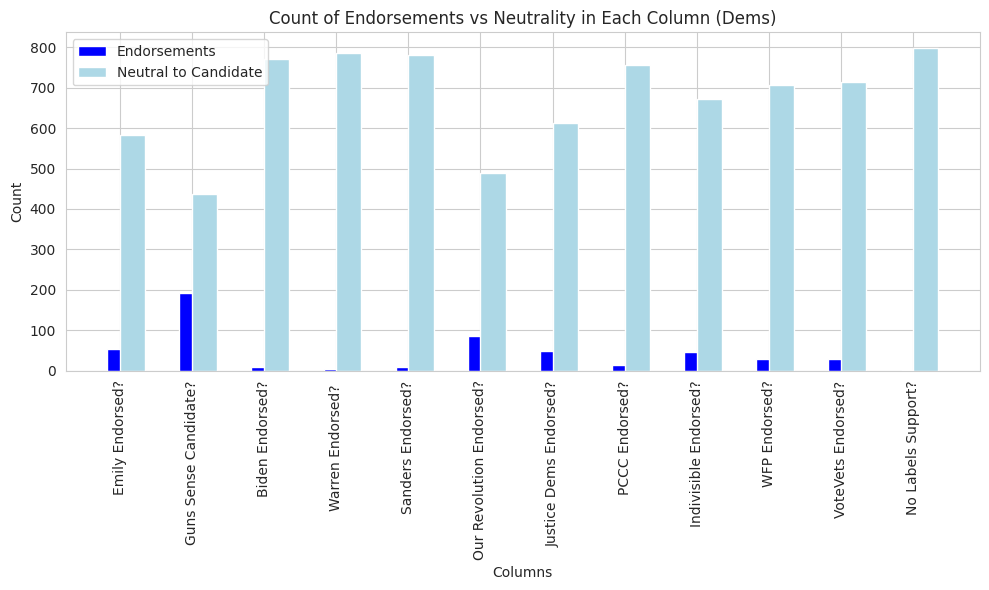

In [ ]:
# Replace pd.NA with NaN for consistency
d_endorsed = d_endorsed.fillna(float('nan'))

# Counting occurrences of 1's and 0's in each column
counts = d_endorsed.apply(lambda x: x.value_counts(dropna=False)).transpose()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(counts.index))

plt.bar(index, counts[1], bar_width, label='Endorsements', color='b', align='center')
plt.bar(index, counts[0], bar_width, label='Neutral to Candidate', color='lightblue', align='edge')

plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Count of Endorsements vs Neutrality in Each Column (Dems)')
plt.xticks(index, counts.index, rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

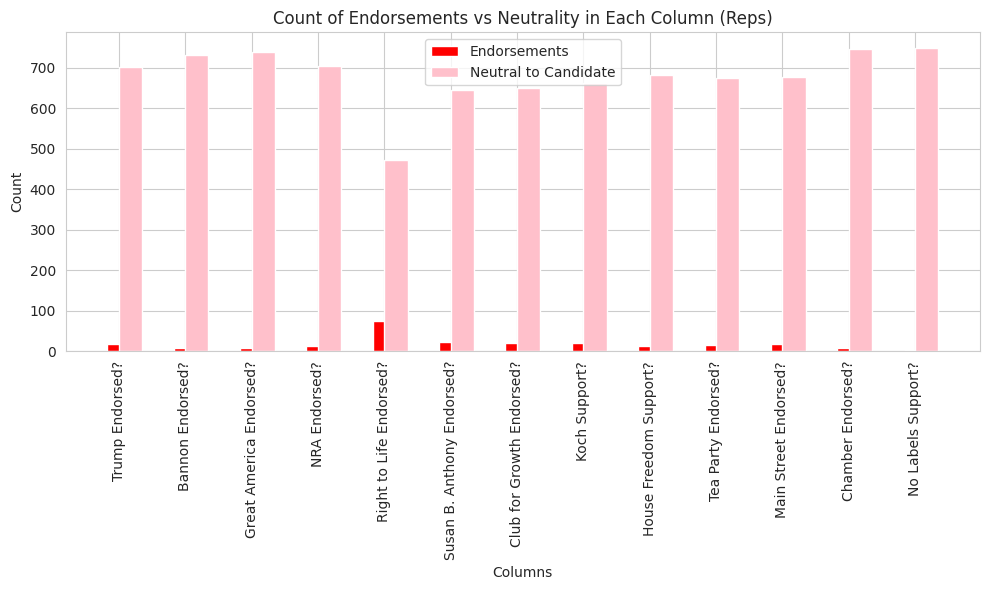

In [ ]:
# Replace pd.NA with NaN for consistency
r_endorsed = r_endorsed.fillna(float('nan'))

# Counting occurrences of 1's and 0's in each column
counts = r_endorsed.apply(lambda x: x.value_counts(dropna=False)).transpose()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(counts.index))

plt.bar(index, counts[1], bar_width, label='Endorsements', color='r', align='center')
plt.bar(index, counts[0], bar_width, label='Neutral to Candidate', color='pink', align='edge')

plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Count of Endorsements vs Neutrality in Each Column (Reps)')
plt.xticks(index, counts.index, rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

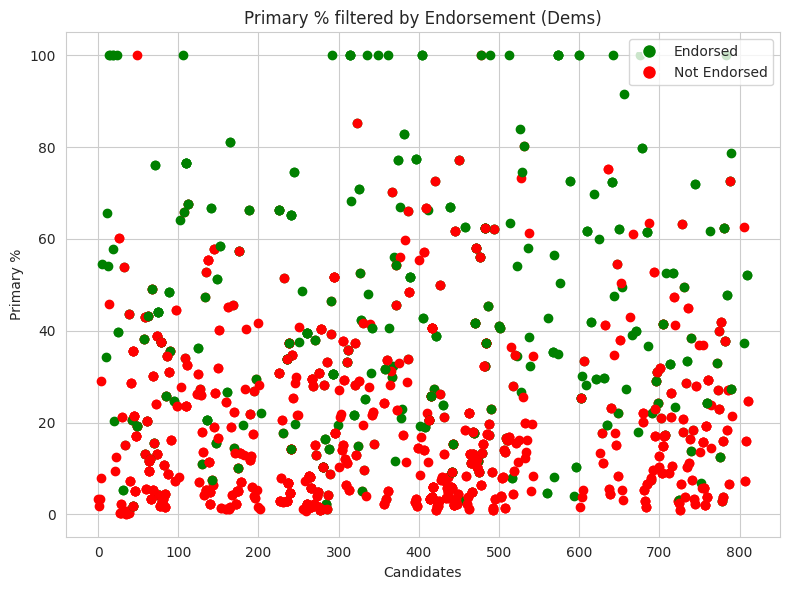

In [ ]:
# Mapping endorsement columns to colors (Dems)
endorsement_colors = {'Yes': 'green', 'No': 'red'}

# Plotting
plt.figure(figsize=(8, 6))

for endorsement_col in dems.columns[20:]:  # Assuming endorsement columns start from column 1
    for endorsement_val, color in endorsement_colors.items():
        filtered_data = dems[dems[endorsement_col] == endorsement_val]
        plt.scatter(
            filtered_data.index,
            filtered_data['Primary %'],
            color=color,
        )

# Creating a custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Endorsed', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Not Endorsed', markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements)

plt.xlabel('Candidates')
plt.ylabel('Primary %')
plt.title('Primary % filtered by Endorsement (Dems)')
plt.tight_layout()
plt.show();


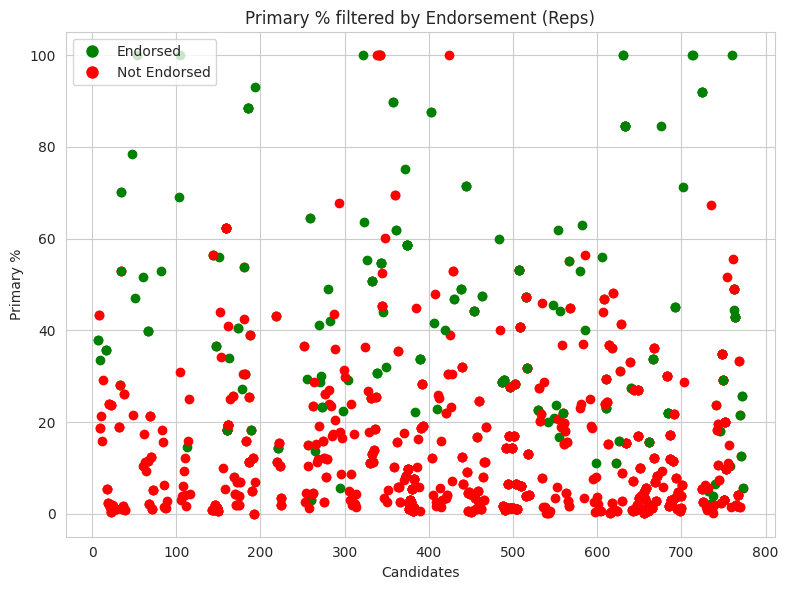

In [ ]:
# Mapping endorsement columns to colors (Reps)
endorsement_colors = {'Yes': 'green', 'No': 'red'}

# Plotting
plt.figure(figsize=(8, 6))

for endorsement_col in reps.columns[12:]:  # Assuming endorsement columns start from column 1
    for endorsement_val, color in endorsement_colors.items():
        filtered_data = reps[reps[endorsement_col] == endorsement_val]
        plt.scatter(
            filtered_data.index,
            filtered_data['Primary %'],
            color=color,
        )

# Creating a custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Endorsed', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Not Endorsed', markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements)

plt.xlabel('Candidates')
plt.ylabel('Primary %')
plt.title('Primary % filtered by Endorsement (Reps)')
plt.tight_layout()
plt.show();

## RQ2

In [ ]:
reps_categorical_gen = ['State', 'Office Type', 'Race Type', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Won Primary']

reps_endorsements = ['Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?']

reps_numerical = ['Primary %']

dems_categorical_gen = ['State', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Won Primary', 'Race']

# for this, leaving out: 'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?',
dems_endorsements = ['Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?']

dems_numerical = ['Partisan Lean', 'Primary %']

In [ ]:
dems[dems_endorsements] = dems[dems_endorsements].fillna("Neutral")
reps[reps_endorsements] = reps[reps_endorsements].fillna("Neutral")

Text(0, 0.5, 'Density')

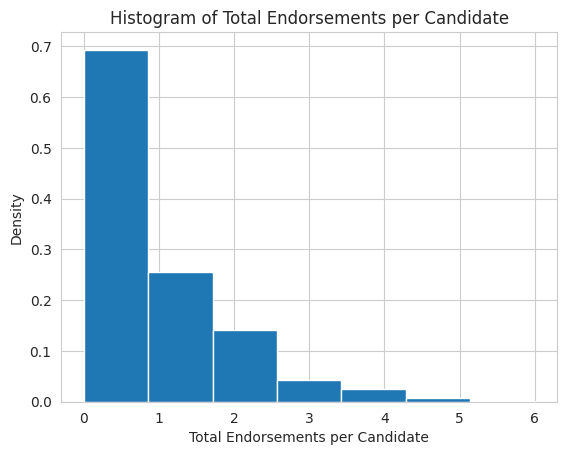

In [ ]:
# Total up endorsements for each candidate

dems['Total Endorsements'] = [dems.iloc[i][dems_endorsements].value_counts().to_dict().get("Yes", 0) for i in np.arange(len(dems))]

reps['Total Endorsements'] = [reps.iloc[i][reps_endorsements].value_counts().to_dict().get("Yes", 0) for i in np.arange(len(reps))]

# Observations: Using known total number of endorsements per candidate in dataset
y_obs = dems["Total Endorsements"]

plt.hist(dems['Total Endorsements'], bins = 7, density = True)
plt.title("Histogram of Total Endorsements per Candidate")
plt.xlabel("Total Endorsements per Candidate")
plt.ylabel("Density")

Text(0.5, 1.0, 'Boxplot of Primary Percentages if Candidate has >=1 Endorsement')

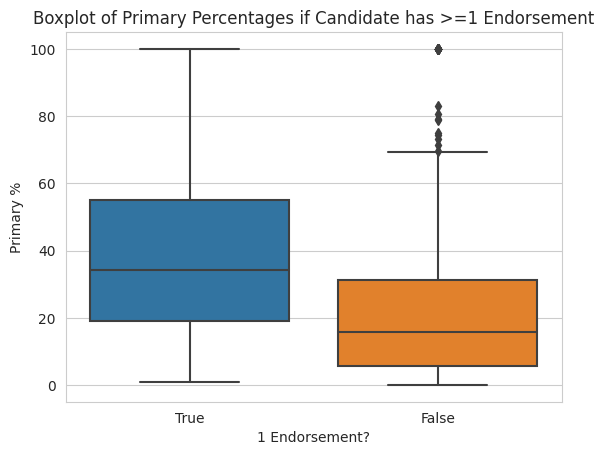

In [ ]:
dems["1 Endorsement?"] = dems["Total Endorsements"] >= 1

sns.boxplot(data=dems, x="1 Endorsement?", y="Primary %", order=[True, False])
plt.title("Boxplot of Primary Percentages if Candidate has >=1 Endorsement")

# RQ1: Multiple Hypothesis Testing

In [ ]:
#filtering out all candidates that win by default
dems_counts = dems.groupby("District").count()["Candidate"].reset_index()
dems_one = dems_counts[dems_counts["Candidate"] == 1]
dems = dems[~dems["District"].isin(dems_one["District"])]

In [ ]:
#filtering out all candidates that win by default
reps_counts = reps.groupby("District").count()["Candidate"].reset_index()
reps_one = reps_counts[reps_counts["Candidate"] == 1]
reps = reps[~reps["District"].isin(reps_one["District"])]

### Hypothesis 1

Null: In the population, the candidates' proportion of winning when endorsed by Emily's List is the same as those not endorsed. Any difference in the sample is due to chance.

Alternative: In the population, the candidates not endorsed by Emily's List have a lower probability of winning than the candidates endorsed.

In [ ]:
emilys_endorse = dems[dems["Emily Endorsed?"] == "Yes"]
emilys_endorse.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
48,Virginia Madueno,CA,U.S. House California District 10,Representative,Regular,6/5/18,Lost,None,None,0.62,...,NaN,NaN,NaN,No,No,NaN,Yes,NaN,NaN,NaN
59,Katie Hill,CA,U.S. House California District 25,Representative,Regular,6/5/18,Advanced,None,On the Ballot,2.02,...,NaN,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN
64,Mai Khanh Tran,CA,U.S. House California District 39,Representative,Regular,6/5/18,Lost,None,None,2.99,...,NaN,NaN,NaN,No,NaN,NaN,No,NaN,No,NaN
75,Katie Porter,CA,U.S. House California District 45,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-1.43,...,NaN,Yes,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN
83,Rachel Payne,CA,U.S. House California District 48,Representative,Regular,6/5/18,Lost,None,None,-4.18,...,NaN,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN


In [ ]:
not_emilys = dems[dems["Emily Endorsed?"].isna()]
not_emilys.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
emilys_prop = len(emilys_endorse[emilys_endorse["Won Primary"] == "Yes"]) / len(emilys_endorse)
not_em_prop = len(not_emilys[not_emilys["Won Primary"] == "Yes"]) / len(not_emilys)

print(emilys_prop)
print(not_em_prop)

0.7
0.26703499079189685


In [ ]:
obs_1 = not_em_prop - emilys_prop
obs_1

-0.4329650092081031

In [ ]:
all_em = emilys_endorse.append(not_emilys)

<ipython-input-9-507b805963ea>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_em = emilys_endorse.append(not_emilys)


In [ ]:
def simulated_diff_1():
  samples = all_em["Emily Endorsed?"].sample(n=len(all_em), replace=False).reset_index()['Emily Endorsed?']
  copy = all_em.copy()
  copy['Shuffled'] = samples
  group1 = copy[copy["Shuffled"] == "Yes"]
  group2 = copy[copy["Shuffled"].isna()]
  return (len(group2[group2["Won Primary"] == "Yes"]) / len(group2)) - (len(group1[group1["Won Primary"] == "Yes"]) / len(group1))

In [ ]:
all_samples_1 = np.array([])
for i in np.arange(5000):
  all_samples_1 = np.append(all_samples_1, simulated_diff_1())

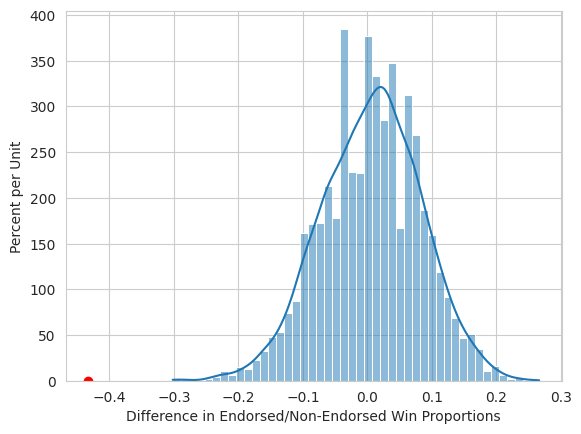

In [ ]:
sns.histplot(all_samples_1, kde=True)
plt.scatter(obs_1, y=0, color='red')

plt.xlabel("Difference in Endorsed/Non-Endorsed Win Proportions")
plt.ylabel("Percent per Unit");

In [ ]:
empirical_p_1 = np.count_nonzero(all_samples_1 <= obs_1) / 5000
empirical_p_1

0.0

### Hypothesis 2

Null: In the population, the candidates' proportion of winning when endorsed by WFP is the same as those not endorsed. Any difference in the sample is due to chance.

Alternative: In the population, the candidates not endorsed by WFP have a lower probability of winning than the candidates endorsed.

In [ ]:
wfp_endorse = dems[dems["WFP Endorsed?"] == "Yes"]
wfp_endorse.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
109,Stacey Abrams,GA,Governor of Georgia,Governor,Regular,5/22/18,Advanced,None,On the Ballot,-8.340000,...,NaN,NaN,Yes,Yes,NaN,Yes,NaN,Yes,NaN,NaN
136,Cathy Glasson,IA,Governor of Iowa,Governor,Regular,6/5/18,Lost,None,None,-8.140000,...,NaN,NaN,NaN,Yes,NaN,Yes,NaN,Yes,NaN,NaN
148,J.D. Scholten,IA,U.S. House Iowa District 4,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-25.110001,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN
226,Liz Watson,IN,U.S. House Indiana District 9,Representative,Regular,5/8/18,Advanced,None,On the Ballot,-26.830000,...,NaN,Yes,NaN,NaN,No,Yes,NaN,Yes,NaN,NaN
261,Ben Jealous,MD,Governor of Maryland,Governor,Regular,6/26/18,Advanced,None,On the Ballot,23.799999,...,NaN,NaN,Yes,Yes,Yes,NaN,NaN,Yes,NaN,NaN


In [ ]:
not_wfp = dems[dems["WFP Endorsed?"].isna()]
not_wfp.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
wfp_prop = len(wfp_endorse[wfp_endorse["Won Primary"] == "Yes"]) / len(wfp_endorse)
not_wfp_prop = len(not_wfp[not_wfp["Won Primary"] == "Yes"]) / len(not_wfp)

print(wfp_prop)
print(not_wfp_prop)

0.4230769230769231
0.25675675675675674


In [ ]:
obs_2 = not_wfp_prop - wfp_prop
obs_2

-0.16632016632016633

In [ ]:
all_wfp = wfp_endorse.append(not_wfp)

<ipython-input-18-9f4c9b26283c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_wfp = wfp_endorse.append(not_wfp)


In [ ]:
def simulated_diff_2():
  samples = all_wfp["WFP Endorsed?"].sample(n=len(all_wfp), replace=False).reset_index()['WFP Endorsed?']
  copy = all_wfp.copy()
  copy['Shuffled'] = samples
  bsw_group1 = copy[copy["Shuffled"] == "Yes"]
  bsw_group2 = copy[copy["Shuffled"].isna()]
  return (len(bsw_group2[bsw_group2["Won Primary"] == "Yes"]) / len(bsw_group2)) - (len(bsw_group1[bsw_group1["Won Primary"] == "Yes"]) / len(bsw_group1))

In [ ]:
all_samples_2 = np.array([])
for i in np.arange(5000):
  all_samples_2 = np.append(all_samples_2, simulated_diff_2())

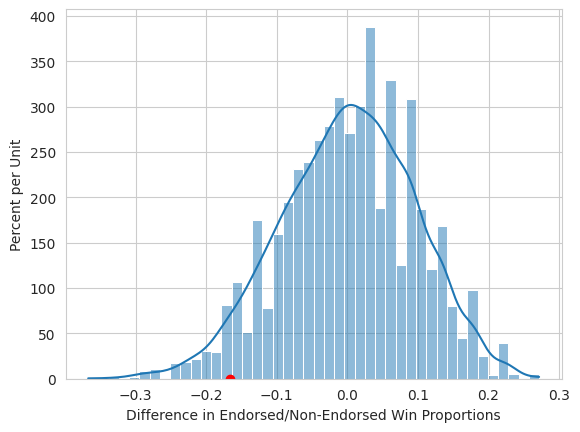

In [ ]:
sns.histplot(all_samples_2, kde=True)
plt.scatter(obs_2, y=0, color='red')

plt.xlabel("Difference in Endorsed/Non-Endorsed Win Proportions")
plt.ylabel("Percent per Unit");

In [ ]:
empirical_p_2 = np.count_nonzero(all_samples_2 <= obs_2) / 5000
empirical_p_2

0.0448

### Hypothesis 3

Null: In the population, the candidates' proportion of winning when endorsed by Guns Sense is the same as those not endorsed. Any difference in the sample is due to chance.

Alternative: In the population, the candidates not endorsed by Guns Sense have a lower probability of winning than the candidates endorsed.

In [ ]:
gs_endorse = dems[dems["Guns Sense Candidate?"] == "Yes"]
gs_endorse.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
5,Walt Maddox,AL,Governor of Alabama,Governor,Regular,6/5/18,Advanced,None,On the Ballot,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Adia McClellan Winfrey,AL,U.S. House Alabama District 3,Representative,Regular,6/5/18,Lost,None,None,-33.660000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Mallory Hagan,AL,U.S. House Alabama District 3,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-33.660000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Lee Auman,AL,U.S. House Alabama District 4,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-62.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Clarke Tucker,AR,U.S. House Arkansas District 2,Representative,Regular,5/22/18,Advanced,None,On the Ballot,-13.510000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
not_gs = dems[dems["Guns Sense Candidate?"].isna()]
not_gs.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
6,Lizzetta Hill McConnell,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Lost,None,None,-30.680000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Robert Kennedy Jr.,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-30.680000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Audri Scott Williams,AL,U.S. House Alabama District 2,Representative,Regular,6/5/18,Lost,None,None,-33.080002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tabitha Isner,AL,U.S. House Alabama District 2,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-33.080002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Jared Henderson,AR,Governor of Arkansas,Governor,Regular,5/22/18,Advanced,None,On the Ballot,-28.639999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gs_prop = len(gs_endorse[gs_endorse["Won Primary"] == "Yes"]) / len(gs_endorse)
not_gs_prop = len(not_gs[not_gs["Won Primary"] == "Yes"]) / len(not_gs)

print(gs_prop)
print(not_gs_prop)

0.3870967741935484
0.2593516209476309


In [ ]:
obs_3 = not_gs_prop - gs_prop
obs_3

-0.12774515324591745

In [ ]:
all_gs = gs_endorse.append(not_gs)

<ipython-input-27-aca790657151>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_gs = gs_endorse.append(not_gs)


In [ ]:
def simulated_diff_3():
  samples = all_gs["Guns Sense Candidate?"].sample(n=len(all_gs), replace=False).reset_index()['Guns Sense Candidate?']
  copy = all_gs.copy()
  copy['Shuffled'] = samples
  bsw_group1 = copy[copy["Shuffled"] == "Yes"]
  bsw_group2 = copy[copy["Shuffled"].isna()]
  return (len(bsw_group2[bsw_group2["Won Primary"] == "Yes"]) / len(bsw_group2)) - (len(bsw_group1[bsw_group1["Won Primary"] == "Yes"]) / len(bsw_group1))

In [ ]:
all_samples_3 = np.array([])
for i in np.arange(5000):
  all_samples_3 = np.append(all_samples_3, simulated_diff_3())

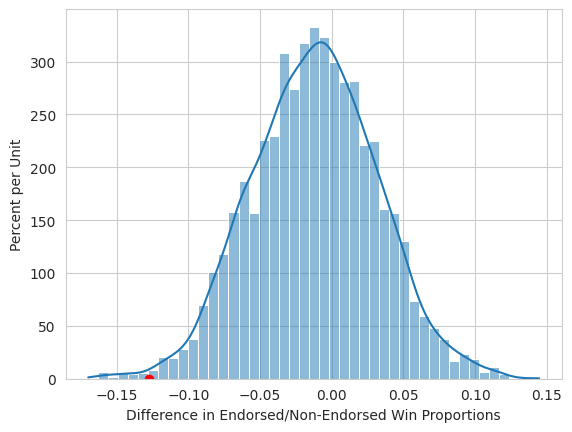

In [ ]:
sns.histplot(all_samples_3, kde=True)
plt.scatter(obs_3, y=0, color='red')

plt.xlabel("Difference in Endorsed/Non-Endorsed Win Proportions")
plt.ylabel("Percent per Unit");

In [ ]:
empirical_p_3 = np.count_nonzero(all_samples_3 <= obs_3) / 5000
empirical_p_3

0.0048

### Hypothesis 4

Null: In the population, the candidates' proportion of winning when endorsed by VoteVets is the same as those not endorsed. Any difference in the sample is due to chance.

Alternative: In the population, the candidates not endorsed by VoteVets have a lower probability of winning than the candidates endorsed.

In [ ]:
vv_endorse = dems[dems["VoteVets Endorsed?"] == "Yes"]
vv_endorse.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
62,Gil Cisneros,CA,U.S. House California District 39,Representative,Regular,6/5/18,Advanced,None,On the Ballot,2.99,...,NaN,NaN,NaN,No,NaN,NaN,No,NaN,Yes,NaN
85,Douglas Applegate,CA,U.S. House California District 49,Representative,Regular,6/5/18,Lost,None,None,1.42,...,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,Yes,NaN
90,Josh Butner,CA,U.S. House California District 50,Representative,Regular,6/5/18,Lost,None,None,-19.48,...,NaN,NaN,NaN,NaN,No,No,No,NaN,Yes,NaN
107,Jason Crow,CO,U.S. House Colorado District 6,Representative,Regular,6/26/18,Advanced,None,On the Ballot,5.42,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes,NaN
165,Brendan Kelly,IL,U.S. House Illinois District 12,Representative,Regular,3/20/18,Advanced,None,On the Ballot,-13.26,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN


In [ ]:
not_vv = dems[dems["VoteVets Endorsed?"].isna()]
not_vv.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
vv_prop = len(vv_endorse[vv_endorse["Won Primary"] == "Yes"]) / len(vv_endorse)
not_vv_prop = len(not_vv[not_vv["Won Primary"] == "Yes"]) / len(not_vv)

print(vv_prop)
print(not_vv_prop)

0.5555555555555556
0.2537313432835821


In [ ]:
obs_4 = not_vv_prop - vv_prop
obs_4

-0.3018242122719735

In [ ]:
all_vv = vv_endorse.append(not_vv)

<ipython-input-36-98c08d821515>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_vv = vv_endorse.append(not_vv)


In [ ]:
def simulated_diff_4():
  samples = all_vv["VoteVets Endorsed?"].sample(n=len(all_vv), replace=False).reset_index()['VoteVets Endorsed?']
  copy = all_vv.copy()
  copy['Shuffled'] = samples
  bsw_group1 = copy[copy["Shuffled"] == "Yes"]
  bsw_group2 = copy[copy["Shuffled"].isna()]
  return (len(bsw_group2[bsw_group2["Won Primary"] == "Yes"]) / len(bsw_group2)) - (len(bsw_group1[bsw_group1["Won Primary"] == "Yes"]) / len(bsw_group1))

In [ ]:
all_samples_4 = np.array([])
for i in np.arange(5000):
  all_samples_4 = np.append(all_samples_4, simulated_diff_4())

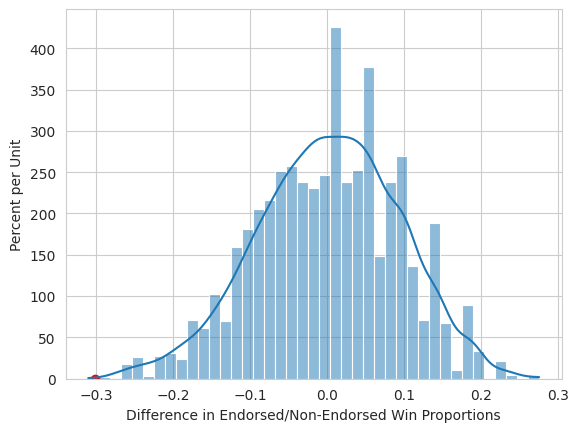

In [ ]:
sns.histplot(all_samples_4, kde=True)
plt.scatter(obs_4, y=0, color='red')

plt.xlabel("Difference in Endorsed/Non-Endorsed Win Proportions")
plt.ylabel("Percent per Unit");

In [ ]:
empirical_p_4 = np.count_nonzero(all_samples_4 <= obs_4) / 5000
empirical_p_4

0.0002

### Hypothesis 5

In [ ]:
new_reps_RTL = reps[(reps["Right to Life Endorsed?"] != 'No')]
new_reps_RTL

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,Kevin Nicholson,WI,U.S. Senate Wisconsin,Senator,Regular,8/14/18,Lost,None,None,42.9,...,No,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
770,Harriet Hageman,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,21.5,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,Sam Galeotos,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,12.5,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,Foster Friess,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,25.6,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_reps_RTL['RTL?'] = (new_reps_RTL['Right to Life Endorsed?'] == 'Yes')
new_reps_RTL

<ipython-input-42-d5acda9bcb83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reps_RTL['RTL?'] = (new_reps_RTL['Right to Life Endorsed?'] == 'Yes')


,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?,RTL?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,Kevin Nicholson,WI,U.S. Senate Wisconsin,Senator,Regular,8/14/18,Lost,None,None,42.9,...,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,True
770,Harriet Hageman,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,21.5,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
771,Sam Galeotos,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,12.5,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
772,Foster Friess,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,25.6,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
observed_prop = len(new_reps_RTL[(new_reps_RTL['RTL?'] == True) & (new_reps_RTL['Won Primary'] == 'Yes')]) / len(new_reps_RTL[new_reps_RTL['RTL?'] == True])
observed_prop

0.4142857142857143

In [ ]:
prop_neutral_won = len(new_reps_RTL[(new_reps_RTL['RTL?'] == False) & (new_reps_RTL['Won Primary'] == 'Yes')])/ len(new_reps_RTL[new_reps_RTL['RTL?'] == False])
observed_diff = observed_prop - prop_neutral_won
observed_diff

0.15375939849624065

In [ ]:
def simulated_diff():
  samples = new_reps_RTL["RTL?"].sample(n=len(new_reps_RTL), replace=False).reset_index()['RTL?']
  copy = new_reps_RTL.copy()
  copy['Shuffled'] = samples
  bsw_group1 = copy[copy["Shuffled"] == True]
  bsw_group2 = copy[copy["Shuffled"] == False]
  return (len(bsw_group1[bsw_group1["Won Primary"] == "Yes"]) / len(bsw_group1)) - (len(bsw_group2[bsw_group2["Won Primary"] == "Yes"]) / len(bsw_group2))
simulated_diff()

0.026666666666666672

In [ ]:
all_samples = np.array([])
for i in np.arange(5000):
  all_samples = np.append(all_samples,  simulated_diff())

all_samples

array([ 0.07939189,  0.02666667,  0.04106252, ..., -0.01630435,
       -0.07692308,  0.07130417])

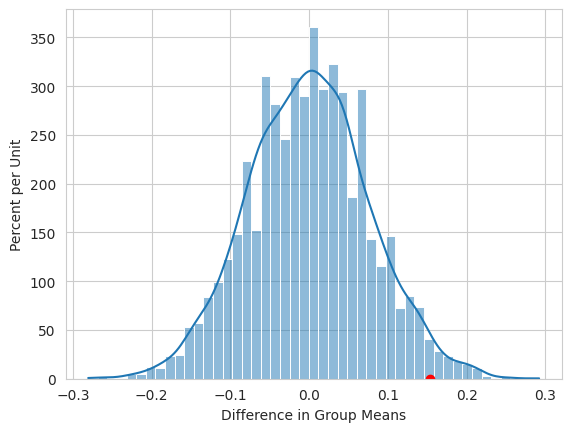

In [ ]:
sns.histplot(all_samples, kde=True)
plt.scatter(observed_diff, y=0, color='red')

plt.xlabel("Difference in Group Means")
plt.ylabel("Percent per Unit");

In [ ]:
empirical_p_5 = np.count_nonzero(all_samples >= observed_diff) / 5000
empirical_p_5

0.0248

### Hypothesis 6

In [ ]:
new_reps_NRA= reps[(reps['NRA Endorsed?'] != 'No')]
new_reps_NRA

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Bill Dahlin,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,1.5,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,Harriet Hageman,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,21.5,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,Sam Galeotos,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,12.5,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,Foster Friess,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,25.6,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_reps_NRA['NRA?'] = (new_reps_NRA['NRA Endorsed?'] == 'Yes')
new_reps_NRA

<ipython-input-50-83bba5c1bc4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reps_NRA['NRA?'] = (new_reps_NRA['NRA Endorsed?'] == 'Yes')


,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?,NRA?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Bill Dahlin,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,1.5,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
770,Harriet Hageman,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,21.5,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
771,Sam Galeotos,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,12.5,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
772,Foster Friess,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,25.6,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
observed_prop = len(new_reps_NRA[(new_reps_NRA['NRA?'] == True) & (new_reps_NRA['Won Primary'] == 'Yes')]) / len(new_reps_NRA[new_reps_NRA['NRA?'] == True])
observed_prop

0.5384615384615384

In [ ]:
prop_neutral_won = len(new_reps_NRA[(new_reps_NRA['NRA?'] == False) & (new_reps_NRA['Won Primary'] == 'Yes')])/ len(new_reps_NRA[new_reps_NRA['NRA?'] == False])
observed_diff = observed_prop - prop_neutral_won
observed_diff

0.3164220647773279

In [ ]:
def simulated_diff():
  samples = new_reps_NRA["NRA?"].sample(n=len(new_reps_NRA), replace=False).reset_index()['NRA?']
  copy = new_reps_NRA.copy()
  copy['Shuffled'] = samples
  bsw_group1 = copy[copy["Shuffled"] == True]
  bsw_group2 = copy[copy["Shuffled"] == False]
  return (len(bsw_group1[bsw_group1["Won Primary"] == "Yes"]) / len(bsw_group1)) - (len(bsw_group2[bsw_group2["Won Primary"] == "Yes"]) / len(bsw_group2))
simulated_diff()

0.07325247366741144

In [ ]:
all_samples = np.array([])
for i in np.arange(5000):
  all_samples = np.append(all_samples,  simulated_diff())

all_samples

array([-0.01440329, -0.24123711, -0.14876033, ...,  0.03719008,
       -0.0371134 , -0.07142857])

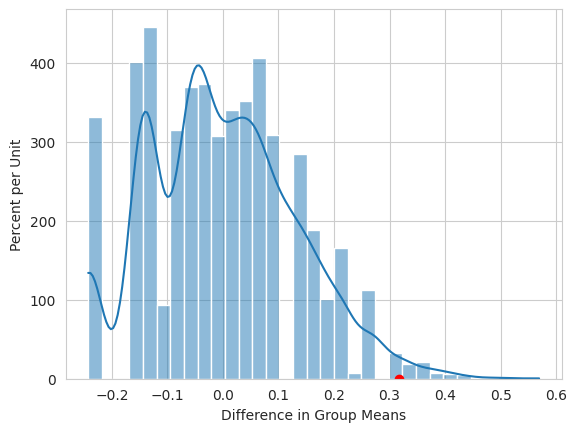

In [ ]:
sns.histplot(all_samples, kde=True)
plt.scatter(observed_diff, y=0, color='red')

plt.xlabel("Difference in Group Means")
plt.ylabel("Percent per Unit");

In [ ]:
empirical_p_6 = np.count_nonzero(all_samples >= observed_diff) / 5000
empirical_p_6

0.0124

### Hypothesis 7

In [ ]:
new_reps = reps[(reps["Club for Growth Endorsed?"] != 'No')]
new_reps

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Bill Dahlin,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,1.5,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,Harriet Hageman,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,21.5,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,Sam Galeotos,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,12.5,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,Foster Friess,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,25.6,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_reps['CFG?'] = (new_reps['Club for Growth Endorsed?'] == 'Yes')
new_reps

<ipython-input-58-412670ee00dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reps['CFG?'] = (new_reps['Club for Growth Endorsed?'] == 'Yes')


,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?,CFG?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Bill Dahlin,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,1.5,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
770,Harriet Hageman,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,21.5,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
771,Sam Galeotos,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,12.5,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
772,Foster Friess,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,25.6,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
observed_prop = len(new_reps[(new_reps['CFG?'] == True) & (new_reps['Won Primary'] == 'Yes')]) / len(new_reps[new_reps['CFG?'] == True])
observed_prop

0.5789473684210527

In [ ]:
prop_neutral_won = len(new_reps[(new_reps['CFG?'] == False) & (new_reps['Won Primary'] == 'Yes')])/ len(new_reps[new_reps['CFG?'] == False])
observed_diff = observed_prop - prop_neutral_won
observed_diff

0.34567431236318646

In [ ]:
def simulated_diff():
  samples = new_reps["CFG?"].sample(n=len(new_reps), replace=False).reset_index()['CFG?']
  copy = new_reps.copy()
  copy['Shuffled'] = samples
  bsw_group1 = copy[copy["Shuffled"] == True]
  bsw_group2 = copy[copy["Shuffled"] == False]
  return (len(bsw_group1[bsw_group1["Won Primary"] == "Yes"]) / len(bsw_group1)) - (len(bsw_group2[bsw_group2["Won Primary"] == "Yes"]) / len(bsw_group2))
simulated_diff()

0.03394777265745008

In [ ]:
all_samples = np.array([])
for i in np.arange(5000):
  all_samples = np.append(all_samples,  simulated_diff())

all_samples

array([-0.16765189,  0.1272578 ,  0.01674365, ..., -0.00317572,
       -0.14653383,  0.14636259])

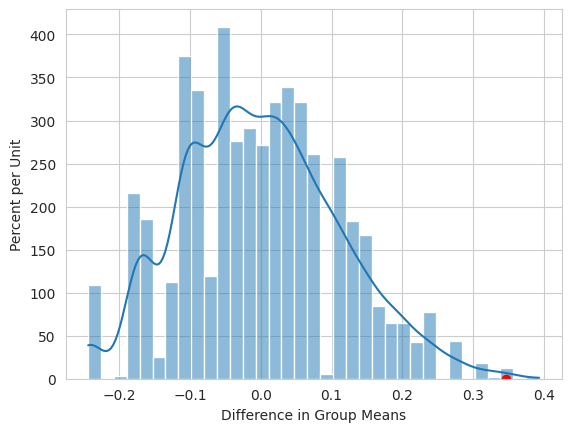

In [ ]:
sns.histplot(all_samples, kde=True)
plt.scatter(observed_diff, y=0, color='red')

plt.xlabel("Difference in Group Means")
plt.ylabel("Percent per Unit");

In [ ]:
empirical_p_7 = np.count_nonzero(all_samples >= observed_diff) / 5000
empirical_p_7

0.0022

In [ ]:
p_values = np.array([empirical_p_1, empirical_p_2, empirical_p_3, empirical_p_4, empirical_p_5, empirical_p_6, empirical_p_7])
p_values

array([0.    , 0.0448, 0.0048, 0.0002, 0.0248, 0.0124, 0.0022])

### Bonferroni Correction

In [ ]:
def bonferroni(p_values, alpha_total):
    """
    Returns decisions on p-values using the Bonferroni correction.

    Inputs:
        p_values: array of p-values
        alpha_total: desired family-wise error rate (FWER = P(at least one false discovery))

    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """

    decisions = p_values < (alpha_total / len(p_values))
    return decisions

In [ ]:
bonferroni_decisions = bonferroni(p_values, 0.05)

print(bonferroni_decisions)

[ True False  True  True False False  True]


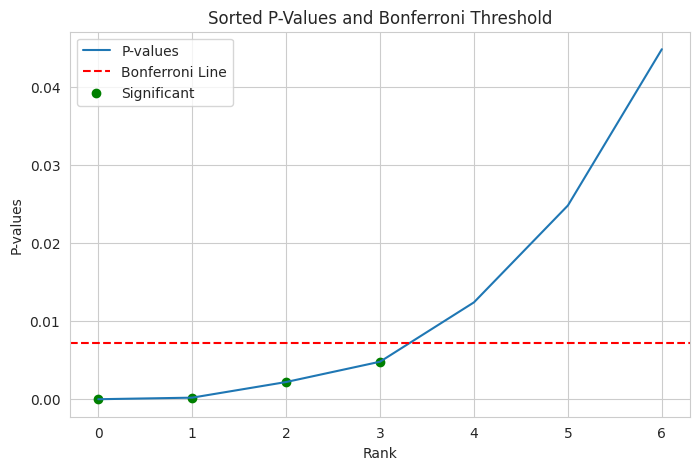

In [ ]:
alpha_total = 0.05

# Sort p-values for plotting
sorted_p_values = np.sort(p_values)

# Calculate Bonferroni line
bonferroni_line = alpha_total / len(sorted_p_values)

# Plotting Bonferroni line and p-values
plt.figure(figsize=(8, 5))
plt.plot(sorted_p_values, label='P-values')
plt.axhline(y=bonferroni_line, color='red', linestyle='--', label='Bonferroni Line')
plt.scatter(np.where(sorted_p_values < bonferroni_line), sorted_p_values[0:4], color='green', label='Significant')

plt.xlabel('Rank')
plt.ylabel('P-values')
plt.title('Sorted P-Values and Bonferroni Threshold')
plt.legend()
plt.grid(True)
plt.show()

### Benjamini-Hochberg

In [ ]:
import statsmodels.stats.multitest as smm
rejected_bh, pvals_corrected, _, _ = smm.multipletests(p_values, alpha=0.05, method='fdr_bh')
# Access the corrected p-values and rejected hypotheses

print("Rejected hypotheses:")
print(rejected_bh)

Rejected hypotheses:
[ True  True  True  True  True  True  True]


### Benjamini-Yekutieli

In [ ]:
# Perform Benjamini-Yekutieli correction
rejected, pvals_corrected, _, _ = smm.multipletests(p_values, alpha=0.05, method='fdr_by')

# Access the corrected p-values and rejected hypotheses
print("Corrected p-values:")
print(pvals_corrected)
print("Rejected hypotheses:")
print(rejected)

Corrected p-values:
[0.       0.11616  0.02178  0.001815 0.07502  0.045012 0.01331 ]
Rejected hypotheses:
[ True False  True  True False  True  True]


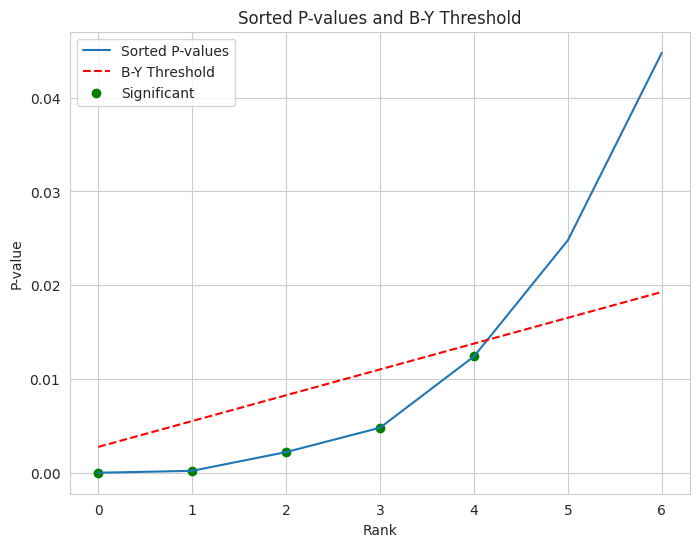

In [ ]:
# Sort the p-values
sorted_p_values = np.sort(p_values)
m = len(sorted_p_values)

# Calculate c(m) = sum(1/i) from i=1 to m
c_m = np.sum(1 / np.arange(1, m + 1))

# Calculate the B-Y threshold
alpha = 0.05
by_threshold_line = np.arange(1, m + 1) / (m * c_m) * alpha

# Plotting the sorted p-values and B-Y threshold
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, m), sorted_p_values, label='Sorted P-values')
plt.plot(np.arange(0, m), by_threshold_line, color='red', linestyle='--', label='B-Y Threshold')
plt.scatter(np.where(sorted_p_values < by_threshold_line), sorted_p_values[0:5], color='green', label='Significant')

plt.xlabel('Rank')
plt.ylabel('P-value')
plt.title('Sorted P-values and B-Y Threshold')
plt.legend()
plt.grid(True)
plt.show()



---



# RQ2: Bayesian Hierarchical Modelling

## PyMC

In [ ]:
N = len(y_obs)
max_endorsements = len(dems_endorsements)
alphas = [1, 1]
betas = [1, 1]

with pm.Model() as model:
    pi = pm.Beta("probInclusive", alpha = 1, beta = 1) #Hidden variable

    z = pm.Bernoulli('inclusiveness', p = pi, shape = N #Hidden variable
    )

    q = pm.Beta('probEndorsedOnce', alpha = alphas, beta = betas, shape = 2) #Hidden variable

    X = pm.Binomial(
        'numEndorsements', n = max_endorsements, p = q[z], observed=y_obs #Observed variable
    )
    trace = pm.sample(500, chains = 2, return_inferencedata = False)

## Results

### Summary of Results

In [ ]:
inclusiveness = trace['inclusiveness']
combined_inclusiveness = inclusiveness.reshape(-1, N)
# print(combined_inclusiveness.shape)
inclusiveness_means = np.mean(combined_inclusiveness, axis = 0)
# print(inclusiveness_means.shape)
print(f'Inclusiveness Mean: {np.mean(inclusiveness_means)}')

probInclusive_mean = np.mean(trace['probInclusive'])
print(f'Probability of Inclusiveness Mean: {np.mean(probInclusive_mean)}')

probEndorsedOnce = trace['probEndorsedOnce']
combined_probEndorsedOnce = probEndorsedOnce.T
# print(combined_probEndorsedOnce.shape)
probEndorsedOnce_means = np.mean(combined_probEndorsedOnce, axis = 1)
print(f'Probability of 1 Endorsement Mean: {np.mean(probEndorsedOnce_means)}')

Inclusiveness Mean: 0.6522478421701603
Probability of Inclusiveness Mean: 0.6520886082869096
Probability of 1 Endorsement Mean: 0.0713828136900323


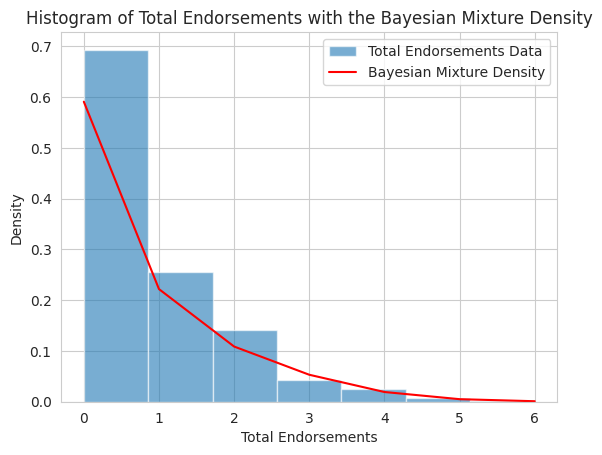

In [ ]:
# Plot the fitted two component mixture density on the histogram (to visualize the fit):
# After pi ~ Beta

plt.hist(dems['Total Endorsements'], bins = 7, density = True, alpha = 0.6, label = 'Total Endorsements Data')
x = np.arange(0, 7)
density = probInclusive_mean * binom.pmf(x, max_endorsements, probEndorsedOnce_means[1]) + (1-probInclusive_mean) * binom.pmf(x, max_endorsements, probEndorsedOnce_means[0])

plt.plot(x, density, 'r', label = 'Bayesian Mixture Density')
plt.title('Histogram of Total Endorsements with the Bayesian Mixture Density')
plt.xlabel('Total Endorsements')
plt.ylabel('Density')
plt.legend()
plt.show()

### Quantifying Uncertainty

95% credible interval lower bound: 0.5209193398611082
95% credible interval upper bound: 0.7839557928318156


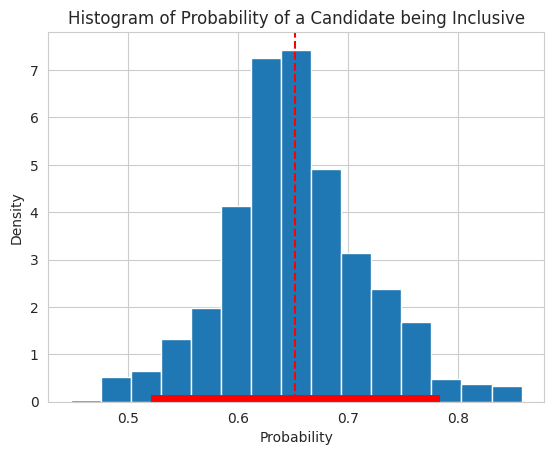

In [ ]:
probInclusive = trace['probInclusive']

print(f'95% credible interval lower bound: {np.percentile(probInclusive, 2.5)}')
print(f'95% credible interval upper bound: {np.percentile(probInclusive, 97.5)}')

plt.hist(probInclusive, density = True, bins=15)
plt.hlines(0, np.percentile(probInclusive, 2.5), np.percentile(probInclusive, 97.5), colors='red', linewidth=10)
plt.axvline(x=np.mean(probInclusive), color='red', linestyle='--')
plt.title("Histogram of Probability of a Candidate being Inclusive")
plt.xlabel('Probability')
plt.ylabel('Density')
plt.show()

In [ ]:
q0 = probEndorsedOnce[:,0]
q1 = probEndorsedOnce[:,1]

95% credible interval lower bound: 0.10330544520048943
95% credible interval upper bound: 0.1598410461479577


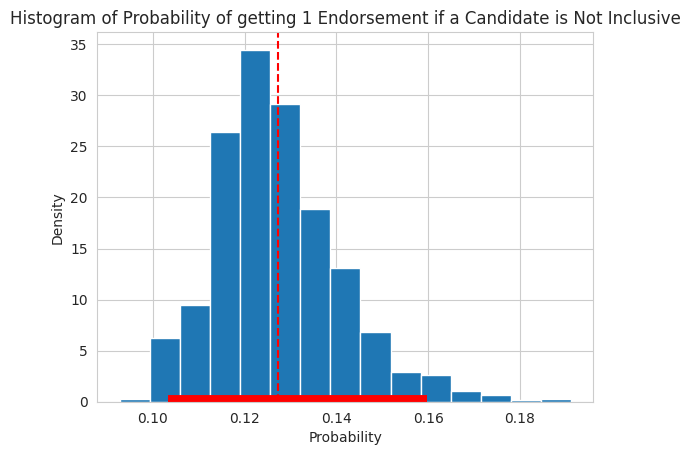

In [ ]:
print(f'95% credible interval lower bound: {np.percentile(q0, 2.5)}')
print(f'95% credible interval upper bound: {np.percentile(q0, 97.5)}')

plt.hist(q0, density = True, bins=15)
plt.hlines(0, np.percentile(q0, 2.5), np.percentile(q0, 97.5), colors='red', linewidth=10)
plt.axvline(x=np.mean(q0), color='red', linestyle='--')
plt.title("Histogram of Probability of getting 1 Endorsement if a Candidate is Not Inclusive")
plt.xlabel('Probability')
plt.ylabel('Density')
plt.show()

95% credible interval lower bound: 0.005593138150413245
95% credible interval upper bound: 0.025833118524857066


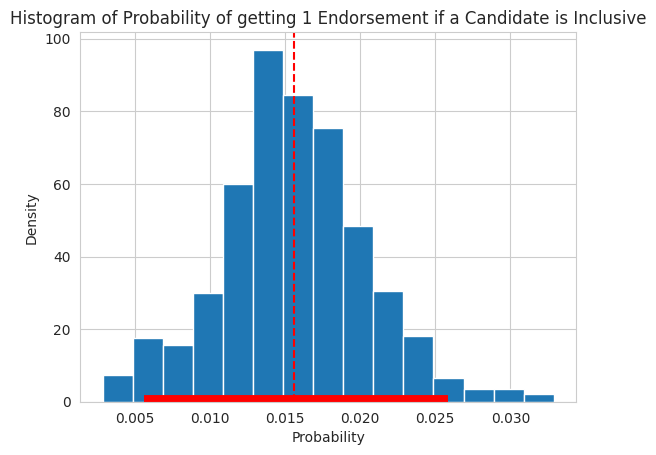

In [ ]:
print(f'95% credible interval lower bound: {np.percentile(q1, 2.5)}')
print(f'95% credible interval upper bound: {np.percentile(q1, 97.5)}')

plt.hist(q1, density = True, bins=15)
plt.hlines(0, np.percentile(q1, 2.5), np.percentile(q1, 97.5), colors='red', linewidth=10)
plt.axvline(x=np.mean(q1), color='red', linestyle='--')
plt.title("Histogram of Probability of getting 1 Endorsement if a Candidate is Inclusive")
plt.xlabel('Probability')
plt.ylabel('Density')
plt.show()

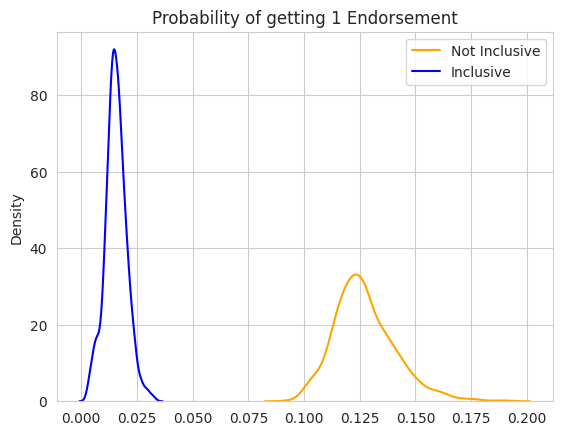

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(q0, ax=ax, label='Not Inclusive', color = 'orange')
sns.kdeplot(q1, ax=ax, label='Inclusive', color = 'blue')
plt.title("Probability of getting 1 Endorsement")
plt.legend()

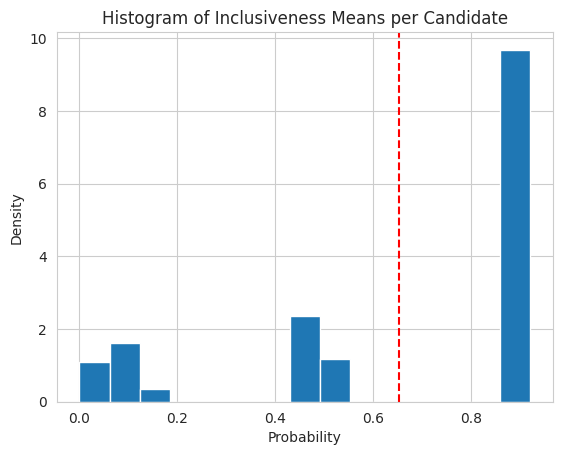

In [ ]:
plt.hist(inclusiveness_means, density = True, bins=15)
plt.axvline(x=np.mean(inclusiveness_means), color='red', linestyle='--')
plt.title("Histogram of Inclusiveness Means per Candidate")
plt.xlabel('Probability')
plt.ylabel('Density')
plt.show()

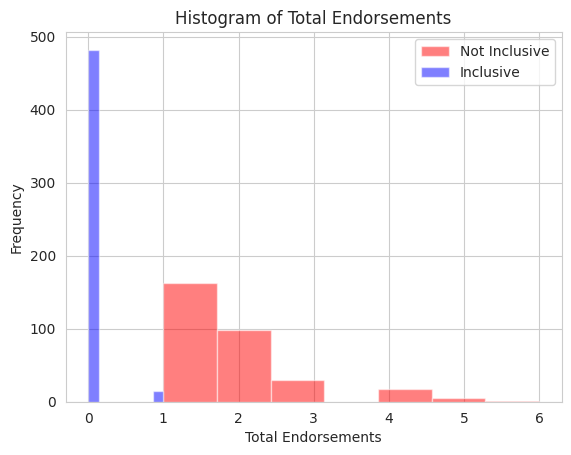

In [ ]:
# Classification
binary_class = (inclusiveness_means > 0.5).astype(int)
dems['Inclusive'] = binary_class

# Plotting total endorsements
not_inc = dems[dems['Inclusive'] == 0]["Total Endorsements"]
inc = dems[dems['Inclusive'] == 1]["Total Endorsements"]
plt.hist(not_inc, bins=7, color='red', alpha=0.5, label="Not Inclusive")
plt.hist(inc, bins=7, color='blue', alpha=0.5, label="Inclusive")
plt.title("Histogram of Total Endorsements")
plt.xlabel("Total Endorsements")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Findings

<Axes: >

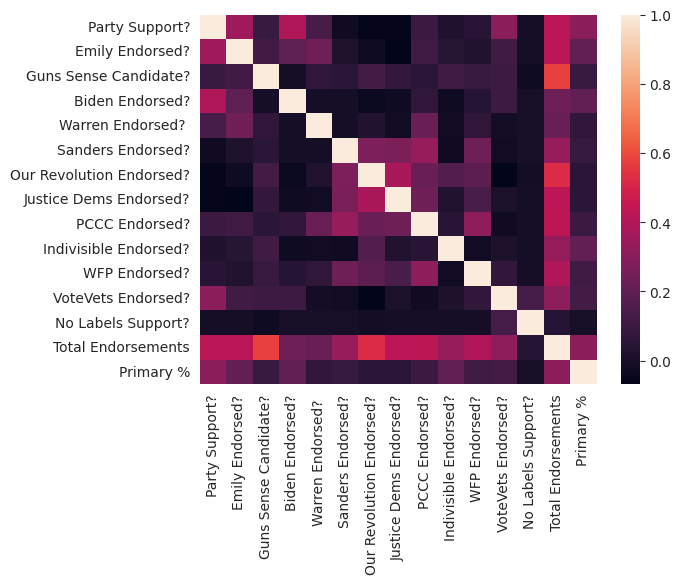

In [ ]:
endorsements_numerical = dems[dems_endorsements].replace(["Yes", "Neutral", "No"], [1, 0, 0])
endorsements_numerical["Total Endorsements"] = dems["Total Endorsements"]
endorsements_numerical["Primary %"] = dems["Primary %"]

sns.heatmap(endorsements_numerical.corr())

## Discussion: Other Models

In [ ]:
with pm.Model() as model_2:
    z = pm.Bernoulli('inclusiveness', p = 0.5, shape = N #Hidden variable
    )

    q = pm.Beta('probEndorsedOnce', alpha = alphas, beta = betas, shape = 2) #Hidden variable

    X = pm.Binomial(
        'numEndorsements', n = max_endorsements, p = q[z], observed=y_obs #Observed variable
    )
    trace2 = pm.sample(500, chains = 2, return_inferencedata = False)

In [ ]:
inclusiveness2 = trace2['inclusiveness']
combined_inclusiveness2 = inclusiveness2.reshape(-1, N)
# print(combined_inclusiveness2.shape)
inclusiveness_means2 = np.mean(combined_inclusiveness2, axis = 0)
# print(inclusiveness_means2.shape)
# print(f'Mean: {np.mean(inclusiveness_means2)}')

probEndorsedOnce2 = trace2['probEndorsedOnce']
combined_probEndorsedOnce2 = probEndorsedOnce2.T
# print(combined_probEndorsedOnce2.shape)
probEndorsedOnce_means2 = np.mean(combined_probEndorsedOnce2, axis = 1)

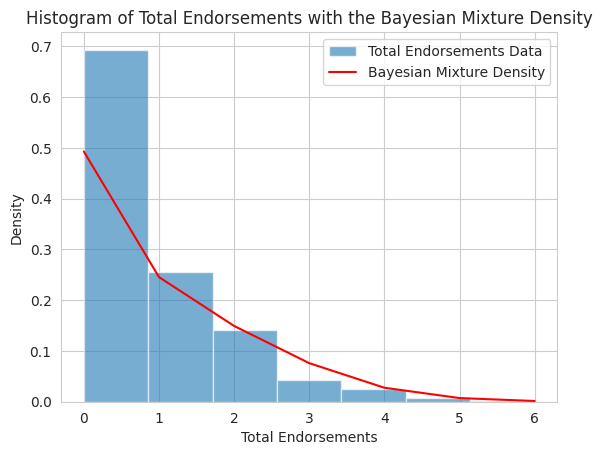

In [ ]:
#Let us plot the fitted two component normal mixture density on the histogram (to visualize the fit):

# pi = 0.5

plt.hist(dems['Total Endorsements'], bins = 7, density = True, alpha = 0.6, label = 'Total Endorsements Data')
x = np.arange(0, 7)
density = 0.5 * binom.pmf(x, max_endorsements, probEndorsedOnce_means[0]) + 0.5 * binom.pmf(x, max_endorsements, probEndorsedOnce_means[1])

plt.plot(x, density, 'r', label = 'Bayesian Mixture Density')
plt.title('Histogram of Total Endorsements with the Bayesian Mixture Density')
plt.xlabel('Total Endorsements')
plt.ylabel('Density')
plt.legend()
plt.show()